# Praktikum 10 | Pengolahan Citra

## Noise Reduction

Fadhil Yori Hibatullah | 
2103161037 | 
2 D3 Teknik Informatika B

---------------------------------------

### Import Dependency

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import random

### Load Image

In [2]:
imgNormal = imageio.imread("gambar4.jpg")

### Show Image

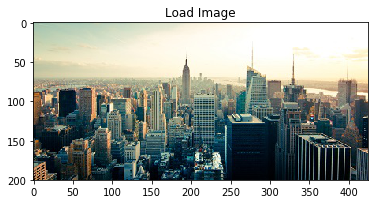

In [3]:
plt.imshow(imgNormal)
plt.title("Load Image")
plt.show()

---------------------

## To Grayscale

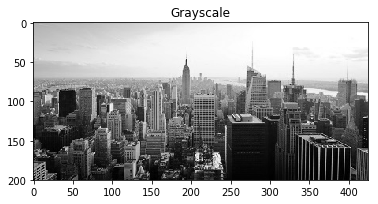

In [4]:
imgGrayscale = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        r = imgNormal[y][x][0]
        g = imgNormal[y][x][1]
        b = imgNormal[y][x][2]
        gr = ( int(r) + int(g) + int(b) ) / 3
        imgGrayscale[y][x] = (gr, gr, gr)
        
plt.imshow(imgGrayscale)
plt.title("Grayscale")
plt.show()

---------------------

##  Noise Gaussian 20%

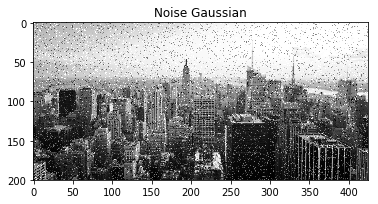

In [5]:
imgNoiseGaussian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            ns = random.randint(0,256) - 128
            xb = int(xg + ns)
            if xb < 0:
                xb = -xb
            if xb > 255:
                xb = 255
        imgNoiseGaussian[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseGaussian)
plt.title("Noise Gaussian")
plt.show()

----------------------

## Noise Speckle 20%

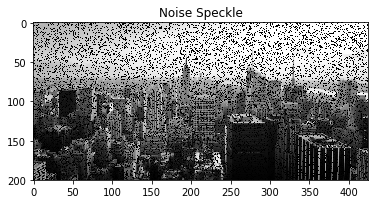

In [6]:
imgNoiseSpeckle = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            xb = 0
        imgNoiseSpeckle[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseSpeckle)
plt.title("Noise Speckle")
plt.show()

----------------------

## Noise Salt and Pepper 20%

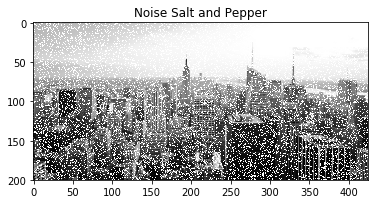

In [7]:
imgNoiseSaltPepper = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

# Add noise
for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        xg = imgGrayscale[y][x][0]
        xb = xg
        nr = random.randint(0,100)
        if nr < 20:
            xb = 255
        imgNoiseSaltPepper[y][x] = (xb, xb, xb)

plt.imshow(imgNoiseSaltPepper)
plt.title("Noise Salt and Pepper")
plt.show()

--------------------------

## Filter Rata - rata

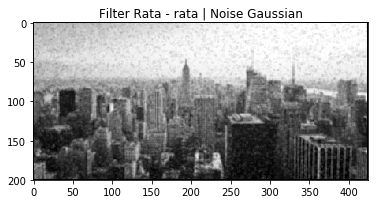

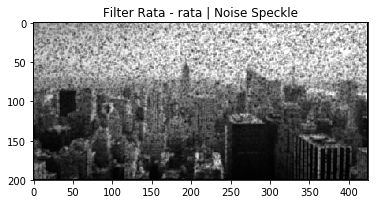

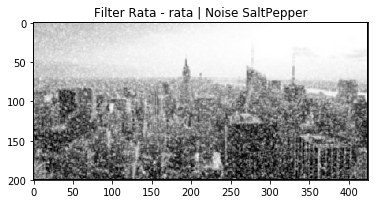

In [8]:
imgFilterRataGaussian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterRataSpeckle = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterRataSaltnPepper = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        # Noise Gaussian
        x1 = int(imgNoiseGaussian[y - 1][x - 1][0])
        x2 = int(imgNoiseGaussian[y][x - 1][0])
        x3 = int(imgNoiseGaussian[y + 1][x - 1][0])
        x4 = int(imgNoiseGaussian[y - 1][x][0])
        x5 = int(imgNoiseGaussian[y][x][0])
        x6 = int(imgNoiseGaussian[y + 1][x][0])
        x7 = int(imgNoiseGaussian[y - 1][x + 1][0])
        x8 = int(imgNoiseGaussian[y][x + 1][0])
        x9 = int(imgNoiseGaussian[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9) / 9)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterRataGaussian[y][x] = (xb, xb, xb)
        # Noise Speckle
        x1 = int(imgNoiseSpeckle[y - 1][x - 1][0])
        x2 = int(imgNoiseSpeckle[y][x - 1][0])
        x3 = int(imgNoiseSpeckle[y + 1][x - 1][0])
        x4 = int(imgNoiseSpeckle[y - 1][x][0])
        x5 = int(imgNoiseSpeckle[y][x][0])
        x6 = int(imgNoiseSpeckle[y + 1][x][0])
        x7 = int(imgNoiseSpeckle[y - 1][x + 1][0])
        x8 = int(imgNoiseSpeckle[y][x + 1][0])
        x9 = int(imgNoiseSpeckle[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9) / 9)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterRataSpeckle[y][x] = (xb, xb, xb)
        # Noise Salt and Pepper
        x1 = int(imgNoiseSaltPepper[y - 1][x - 1][0])
        x2 = int(imgNoiseSaltPepper[y][x - 1][0])
        x3 = int(imgNoiseSaltPepper[y + 1][x - 1][0])
        x4 = int(imgNoiseSaltPepper[y - 1][x][0])
        x5 = int(imgNoiseSaltPepper[y][x][0])
        x6 = int(imgNoiseSaltPepper[y + 1][x][0])
        x7 = int(imgNoiseSaltPepper[y - 1][x + 1][0])
        x8 = int(imgNoiseSaltPepper[y][x + 1][0])
        x9 = int(imgNoiseSaltPepper[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9) / 9)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterRataSaltnPepper[y][x] = (xb, xb, xb)

plt.imshow(imgFilterRataGaussian)
plt.title("Filter Rata - rata | Noise Gaussian")
plt.show()

plt.imshow(imgFilterRataSpeckle)
plt.title("Filter Rata - rata | Noise Speckle")
plt.show()

plt.imshow(imgFilterRataSaltnPepper)
plt.title("Filter Rata - rata | Noise SaltPepper")
plt.show()

---------------------

## Filter Gaussian

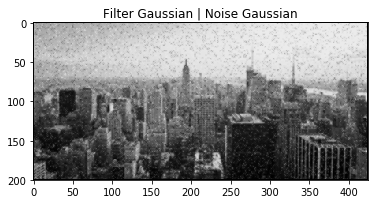

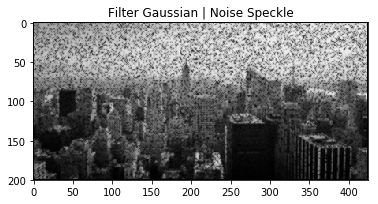

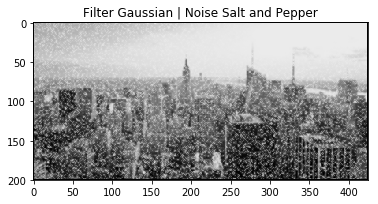

In [9]:
imgFilterGaussian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterGaussianSpeckle = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterGaussianSaltnPepper = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        # Noise Gaussian
        x1 = int(imgNoiseGaussian[y - 1][x - 1][0])
        x2 = int(imgNoiseGaussian[y][x - 1][0])
        x3 = int(imgNoiseGaussian[y + 1][x - 1][0])
        x4 = int(imgNoiseGaussian[y - 1][x][0])
        x5 = int(imgNoiseGaussian[y][x][0])
        x6 = int(imgNoiseGaussian[y + 1][x][0])
        x7 = int(imgNoiseGaussian[y - 1][x + 1][0])
        x8 = int(imgNoiseGaussian[y][x + 1][0])
        x9 = int(imgNoiseGaussian[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + (4 * x5) + x6 + x7 + x8 + x9) / 13)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterGaussian[y][x] = (xb, xb, xb)
        # Noise Speckle
        x1 = int(imgNoiseSpeckle[y - 1][x - 1][0])
        x2 = int(imgNoiseSpeckle[y][x - 1][0])
        x3 = int(imgNoiseSpeckle[y + 1][x - 1][0])
        x4 = int(imgNoiseSpeckle[y - 1][x][0])
        x5 = int(imgNoiseSpeckle[y][x][0])
        x6 = int(imgNoiseSpeckle[y + 1][x][0])
        x7 = int(imgNoiseSpeckle[y - 1][x + 1][0])
        x8 = int(imgNoiseSpeckle[y][x + 1][0])
        x9 = int(imgNoiseSpeckle[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + (4 * x5) + x6 + x7 + x8 + x9) / 13)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterGaussianSpeckle[y][x] = (xb, xb, xb)
        # Noise Salt and Pepper
        x1 = int(imgNoiseSaltPepper[y - 1][x - 1][0])
        x2 = int(imgNoiseSaltPepper[y][x - 1][0])
        x3 = int(imgNoiseSaltPepper[y + 1][x - 1][0])
        x4 = int(imgNoiseSaltPepper[y - 1][x][0])
        x5 = int(imgNoiseSaltPepper[y][x][0])
        x6 = int(imgNoiseSaltPepper[y + 1][x][0])
        x7 = int(imgNoiseSaltPepper[y - 1][x + 1][0])
        x8 = int(imgNoiseSaltPepper[y][x + 1][0])
        x9 = int(imgNoiseSaltPepper[y + 1][x + 1][0])
        xb = int((x1 + x2 + x3 + x4 + (4 * x5) + x6 + x7 + x8 + x9) / 13)
        if xb < 0:
            xb = 0
        if xb > 255:
            xb = 255
        imgFilterGaussianSaltnPepper[y][x] = (xb, xb, xb)
        
plt.imshow(imgFilterGaussian)
plt.title("Filter Gaussian | Noise Gaussian")
plt.show()

plt.imshow(imgFilterGaussianSpeckle)
plt.title("Filter Gaussian | Noise Speckle")
plt.show()

plt.imshow(imgFilterGaussianSaltnPepper)
plt.title("Filter Gaussian | Noise Salt and Pepper")
plt.show()

---------------------

## Filter Median

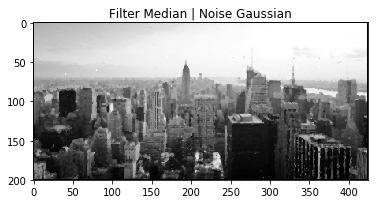

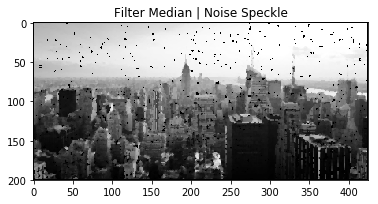

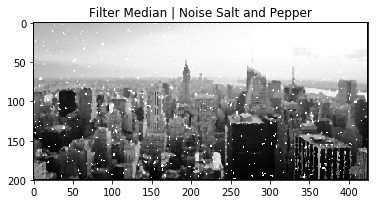

In [10]:
imgFilterMedianGaussian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterMedianSpeckle = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgFilterMedianSaltPepper = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
xt = np.zeros((10))
for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        # Noise Gaussian
        xt[1] = int(imgNoiseGaussian[y - 1][x - 1][0])
        xt[2] = int(imgNoiseGaussian[y][x - 1][0])
        xt[3] = int(imgNoiseGaussian[y + 1][x - 1][0])
        xt[4] = int(imgNoiseGaussian[y - 1][x][0])
        xt[5] = int(imgNoiseGaussian[y][x][0])
        xt[6] = int(imgNoiseGaussian[y + 1][x][0])
        xt[7] = int(imgNoiseGaussian[y - 1][x + 1][0])
        xt[8] = int(imgNoiseGaussian[y][x + 1][0])
        xt[9] = int(imgNoiseGaussian[y + 1][x + 1][0])
        for i in range(1, 9):
            for j in range(1, 9):
                if xt[j] > xt[j + 1]:
                    a = xt[j]
                    xt[j] = xt[j + 1]
                    xt[j + 1] = a
        xb = xt[5]
        imgFilterMedianGaussian[y][x] = (xb, xb, xb)
        # Noise Speckle
        xt[1] = int(imgNoiseSpeckle[y - 1][x - 1][0])
        xt[2] = int(imgNoiseSpeckle[y][x - 1][0])
        xt[3] = int(imgNoiseSpeckle[y + 1][x - 1][0])
        xt[4] = int(imgNoiseSpeckle[y - 1][x][0])
        xt[5] = int(imgNoiseSpeckle[y][x][0])
        xt[6] = int(imgNoiseSpeckle[y + 1][x][0])
        xt[7] = int(imgNoiseSpeckle[y - 1][x + 1][0])
        xt[8] = int(imgNoiseSpeckle[y][x + 1][0])
        xt[9] = int(imgNoiseSpeckle[y + 1][x + 1][0])
        for i in range(1, 9):
            for j in range(1, 9):
                if xt[j] > xt[j + 1]:
                    a = xt[j]
                    xt[j] = xt[j + 1]
                    xt[j + 1] = a
        xb = xt[5]
        imgFilterMedianSpeckle[y][x] = (xb, xb, xb)
        # Noise Salt and Pepper
        xt[1] = int(imgNoiseSaltPepper[y - 1][x - 1][0])
        xt[2] = int(imgNoiseSaltPepper[y][x - 1][0])
        xt[3] = int(imgNoiseSaltPepper[y + 1][x - 1][0])
        xt[4] = int(imgNoiseSaltPepper[y - 1][x][0])
        xt[5] = int(imgNoiseSaltPepper[y][x][0])
        xt[6] = int(imgNoiseSaltPepper[y + 1][x][0])
        xt[7] = int(imgNoiseSaltPepper[y - 1][x + 1][0])
        xt[8] = int(imgNoiseSaltPepper[y][x + 1][0])
        xt[9] = int(imgNoiseSaltPepper[y + 1][x + 1][0])
        for i in range(1, 9):
            for j in range(1, 9):
                if xt[j] > xt[j + 1]:
                    a = xt[j]
                    xt[j] = xt[j + 1]
                    xt[j + 1] = a
        xb = xt[5]
        imgFilterMedianSaltPepper[y][x] = (xb, xb, xb)

plt.imshow(imgFilterMedianGaussian)
plt.title("Filter Median | Noise Gaussian")
plt.show()

plt.imshow(imgFilterMedianSpeckle)
plt.title("Filter Median | Noise Speckle")
plt.show()

plt.imshow(imgFilterMedianSaltPepper)
plt.title("Filter Median | Noise Salt and Pepper")
plt.show()